In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt      #importing the basic requirements
import seaborn as sns
import os

In [2]:
os.getcwd()    #Checking the directory

'/Users/ajithkhan/Downloads/Data Science /LMS/Machine Learning/10th July Session Materials'

In [3]:
df = pd.read_csv("/Users/ajithkhan/Downloads/Data Science /Projects/Kaggle /HVAC Energy Data.csv")        #Read the file
df.head()

,Local Time (Timezone : GMT+8h),Chilled Water Rate (L/sec),Cooling Water Temperature (C),Building Load (RT),Chiller Energy Consumption (kWh),Outside Temperature (F),Dew Point (F),Humidity (%),Wind Speed (mph),Pressure (in)
0,8/18/2019 0:00,85.6,31.4,479.6,116.2,82,75,79,13,29.83
1,8/18/2019 0:30,84.3,31.1,460.3,114.5,82,75,79,12,29.83
2,8/18/2019 1:00,84.6,31.3,462.4,116.8,82,75,79,12,29.83
3,8/18/2019 1:30,84.8,31.4,458.5,117.0,82,75,79,12,29.83
4,8/18/2019 2:00,84.7,31.4,455.4,117.0,82,75,79,12,29.83


In [4]:
df.shape #Number of samples and features

(13615, 10)

In [5]:
df.info()   #Basic info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13615 entries, 0 to 13614
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Local Time (Timezone : GMT+8h)    13615 non-null  object 
 1   Chilled Water Rate (L/sec)        13615 non-null  float64
 2   Cooling Water Temperature (C)     13615 non-null  float64
 3   Building Load (RT)                13615 non-null  float64
 4   Chiller Energy Consumption (kWh)  13615 non-null  float64
 5   Outside Temperature (F)           13615 non-null  int64  
 6   Dew Point (F)                     13615 non-null  int64  
 7   Humidity (%)                      13615 non-null  int64  
 8   Wind Speed (mph)                  13615 non-null  int64  
 9   Pressure (in)                     13615 non-null  float64
dtypes: float64(5), int64(4), object(1)
memory usage: 1.0+ MB


In [6]:
df.isna().sum()        #Chcking for nulls

Local Time (Timezone : GMT+8h)      0
Chilled Water Rate (L/sec)          0
Cooling Water Temperature (C)       0
Building Load (RT)                  0
Chiller Energy Consumption (kWh)    0
Outside Temperature (F)             0
Dew Point (F)                       0
Humidity (%)                        0
Wind Speed (mph)                    0
Pressure (in)                       0
dtype: int64

In [7]:
df.describe().T   #Distribution of dataset

,count,mean,std,min,25%,50%,75%,max
Chilled Water Rate (L/sec),13615.0,96.740720,12.558907,72.40,86.90,94.2,106.10,141.50
Cooling Water Temperature (C),13615.0,31.622277,1.253298,25.80,30.80,31.5,32.50,36.20
Building Load (RT),13615.0,520.940419,96.336004,55.10,443.50,495.6,595.00,1088.40
Chiller Energy Consumption (kWh),13615.0,126.811605,30.160350,18.00,105.60,118.1,138.30,281.20
Outside Temperature (F),13615.0,83.104003,3.841550,73.00,81.00,82.0,86.00,93.00
Dew Point (F),13615.0,74.990892,1.889539,59.00,73.00,75.0,77.00,81.00
Humidity (%),13615.0,77.846272,11.050784,34.00,70.00,79.0,84.00,100.00
Wind Speed (mph),13615.0,6.306794,3.742418,0.00,3.00,6.0,9.00,21.00
Pressure (in),13615.0,29.808199,0.051419,29.62,29.77,29.8,29.83,29.95


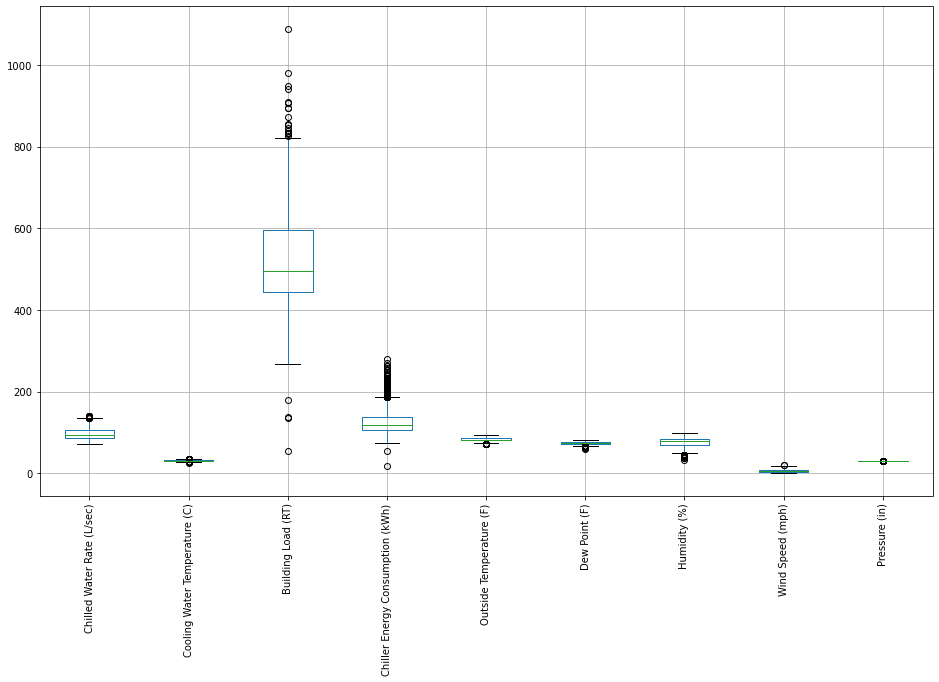

In [8]:
df.boxplot(rot=90, figsize= (16,9));     #Lets check for Outliers. 

In [9]:
df.columns

Index(['Local Time (Timezone : GMT+8h)', 'Chilled Water Rate (L/sec)',
       'Cooling Water Temperature (C)', 'Building Load (RT)',
       'Chiller Energy Consumption (kWh)', 'Outside Temperature (F)',
       'Dew Point (F)', 'Humidity (%)', 'Wind Speed (mph)', 'Pressure (in)'],
      dtype='object')

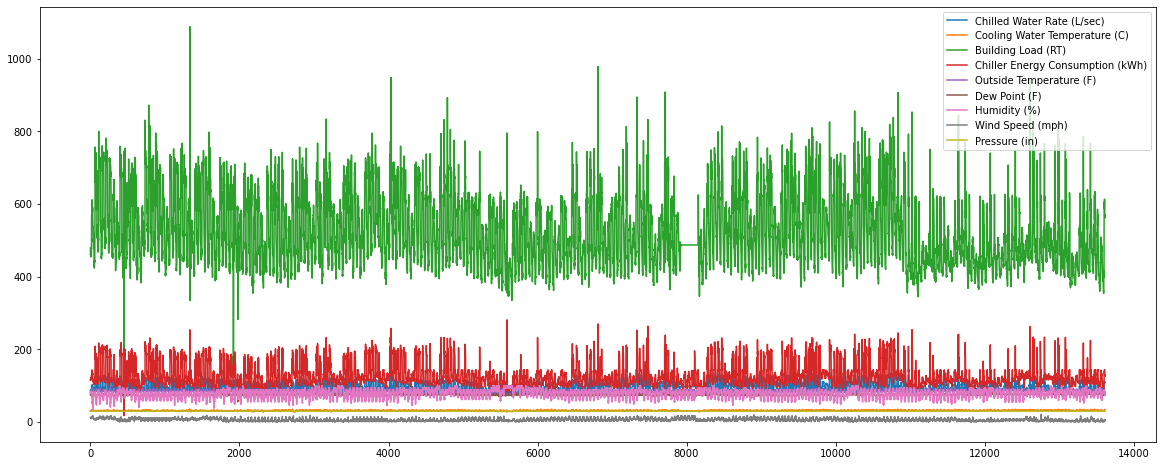

In [11]:
df.plot(figsize = (20,8));

In [30]:
#Lets treat those outliers
# 1. Chilled water rate(L/sec)
a = df['Chilled Water Rate (L/sec)'].quantile(0.75)
b = df['Chilled Water Rate (L/sec)'].quantile(0.25)
IQR = a-b
IQR
ub = a + (1.5*IQR)
lb = b - (1.5*IQR)
ub,lb
def rem_out(x):
    if x>ub:
         return ub
    elif x<lb:
         return lb
    else:
         return x

In [31]:
df['Chilled Water Rate (L/sec)'] = df['Chilled Water Rate (L/sec)'].apply(rem_out)

In [32]:
# 2. Building Load (RT)
a1 = df['Building Load (RT)'].quantile(0.75)
b1 = df['Building Load (RT)'].quantile(0.25)
IQR1 = a1-b1
ub1 = a1 + (1.5*IQR1)
lb1 = b1 - (1.5*IQR1)
def rem_out1(x1):
    if x1>ub1:
         return ub1
    elif x1<lb1:
         return lb1
    else:
         return x1

In [33]:
df['Building Load (RT)'] = df['Building Load (RT)'].apply(rem_out1)

In [34]:
# 3. Chiller Energy Consumption (kWh)
a2 = df['Chiller Energy Consumption (kWh)'].quantile(0.75)
b2 = df['Chiller Energy Consumption (kWh)'].quantile(0.25)
IQR2 = a2-b2
ub2 = a2 + (1.5*IQR2)
lb2 = b2 - (1.5*IQR2)
def rem_out2(x2):
    if x2>ub2:
         return ub2
    elif x2<lb2:
         return lb2
    else:
         return x2

In [35]:
df['Chiller Energy Consumption (kWh)'] = df['Chiller Energy Consumption (kWh)'].apply(rem_out2)

In [36]:
# 4. Humidity (%)
a3 = df['Humidity (%)'].quantile(0.75)
b3 = df['Humidity (%)'].quantile(0.25)
IQR3 = (a3 - b3)
ub3 = a3 + (1.5*IQR3)
lb3 = b3 - (1.5*IQR3)
def rem_out3(x3):
    if x3>ub3:
         return ub3
    elif x3<lb3:
         return lb3
    else:
         return x3

In [37]:
df['Humidity (%)'] = df['Humidity (%)'].apply(rem_out3)

In [38]:
# 5.Dew Point (F)
a4 = df['Dew Point (F)'].quantile(0.75)
b4 = df['Dew Point (F)'].quantile(0.25)
IQR4 = (a4 - b4)
ub4 = a4 + (1.5*IQR4)
lb4 = b4 - (1.5*IQR4)
def rem_out4(x4):
    if x4>ub4:
         return ub4
    elif x4<lb4:
         return lb4
    else:
         return x4

In [ ]:
df['Dew Point (F)'] = df['Dew Point (F)'].apply(rem_out4)

In [46]:
#6. Cooling Water Temperature (C)
a5 = df['Cooling Water Temperature (C)'].quantile(0.75)
b5 = df['Cooling Water Temperature (C)'].quantile(0.25)
IQR5 = (a5 - b5)
ub5 = a5 + (1.5*IQR5)
lb5 = b5 - (1.5*IQR5)
def rem_out5(x5):
    if x5>ub5:
         return ub5
    elif x5<lb5:
         return lb5
    else:
         return x5
df['Cooling Water Temperature (C)'] = df['Cooling Water Temperature (C)'].apply(rem_out5)

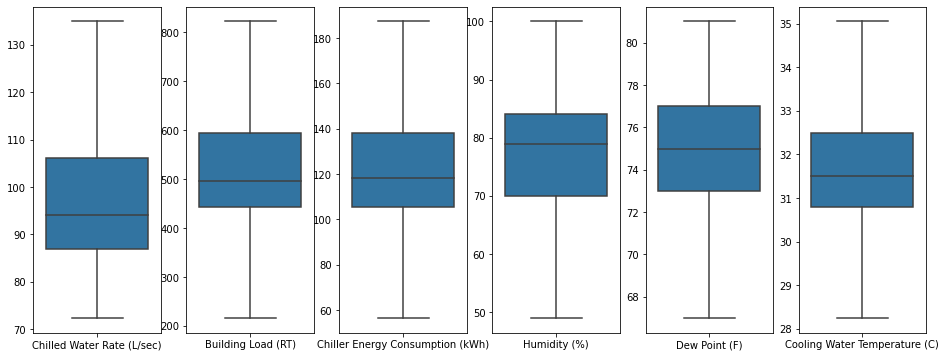

In [48]:
#After removal of Outliers
fig,axis = plt.subplots(nrows= 1, ncols = 6, figsize = (16,6))
sns.boxplot(data = df[['Chilled Water Rate (L/sec)']], ax =axis[0]);
sns.boxplot(data = df[['Building Load (RT)']], ax =axis[1]);
sns.boxplot(data = df[['Chiller Energy Consumption (kWh)']], ax =axis[2]);          #All the outlier columns using seaborn
sns.boxplot(data = df[['Humidity (%)']], ax =axis[3]);
sns.boxplot(data = df[['Dew Point (F)']], ax =axis[4]);
sns.boxplot(data = df[['Cooling Water Temperature (C)']], ax =axis[5]);

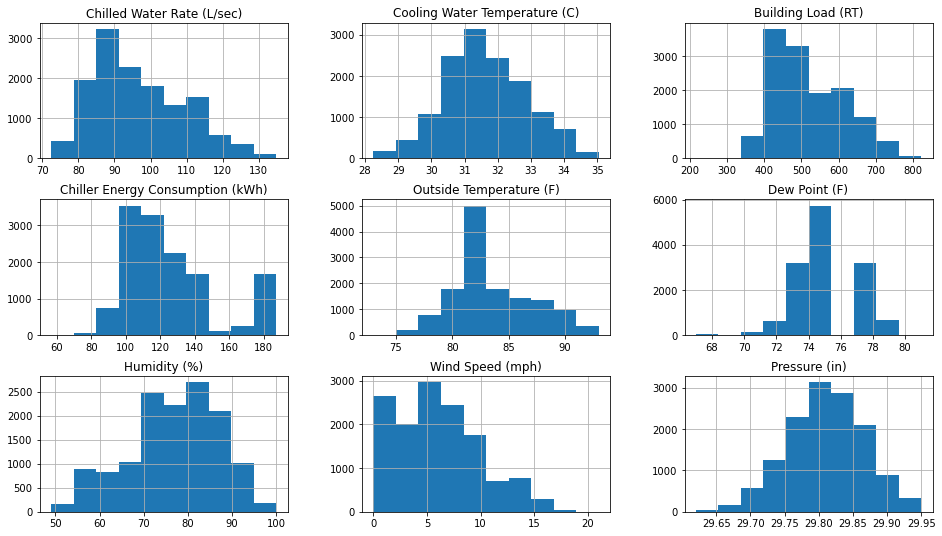

In [118]:
#Lets see the distribution 
df.hist(figsize= (16,9));

In [53]:
#Lets drop the time 
df = df.drop('Local Time (Timezone : GMT+8h)', axis =1)
df.head()

,Chilled Water Rate (L/sec),Cooling Water Temperature (C),Building Load (RT),Chiller Energy Consumption (kWh),Outside Temperature (F),Dew Point (F),Humidity (%),Wind Speed (mph),Pressure (in)
0,85.6,31.4,479.6,116.2,82,75.0,79.0,13,29.83
1,84.3,31.1,460.3,114.5,82,75.0,79.0,12,29.83
2,84.6,31.3,462.4,116.8,82,75.0,79.0,12,29.83
3,84.8,31.4,458.5,117.0,82,75.0,79.0,12,29.83
4,84.7,31.4,455.4,117.0,82,75.0,79.0,12,29.83


In [61]:
df.corr()

,Chilled Water Rate (L/sec),Cooling Water Temperature (C),Building Load (RT),Chiller Energy Consumption (kWh),Outside Temperature (F),Dew Point (F),Humidity (%),Wind Speed (mph),Pressure (in)
Chilled Water Rate (L/sec),1.000000,0.431588,0.906479,0.851761,0.594693,-0.221358,-0.606679,0.503738,-0.058127
Cooling Water Temperature (C),0.431588,1.000000,0.428013,0.321401,0.479777,0.164070,-0.366497,0.267505,-0.116452
Building Load (RT),0.906479,0.428013,1.000000,0.919123,0.579416,-0.210598,-0.591176,0.473936,-0.094248
Chiller Energy Consumption (kWh),0.851761,0.321401,0.919123,1.000000,0.571114,-0.142617,-0.554043,0.434084,-0.144242
Outside Temperature (F),0.594693,0.479777,0.579416,0.571114,1.000000,-0.139688,-0.918608,0.545066,-0.201519
Dew Point (F),-0.221358,0.164070,-0.210598,-0.142617,-0.139688,1.000000,0.501059,-0.319883,-0.033942
Humidity (%),-0.606679,-0.366497,-0.591176,-0.554043,-0.918608,0.501059,1.000000,-0.612517,0.158791
Wind Speed (mph),0.503738,0.267505,0.473936,0.434084,0.545066,-0.319883,-0.612517,1.000000,-0.047026
Pressure (in),-0.058127,-0.116452,-0.094248,-0.144242,-0.201519,-0.033942,0.158791,-0.047026,1.000000


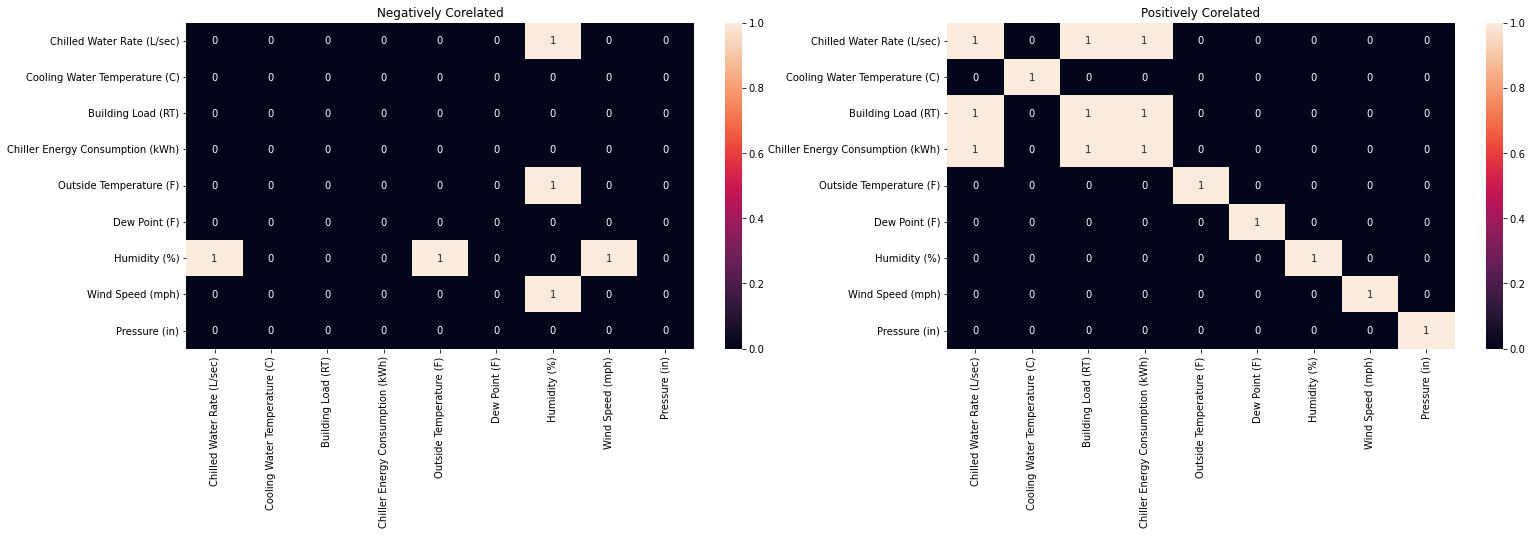

In [114]:
#Lets see the relationship between the features
fig,axis = plt.subplots(nrows =1, ncols=2, figsize = (25,6));
p = sns.heatmap(data = (df.corr()<-0.6), annot = True, ax = axis[0]);
q = sns.heatmap(data = (df.corr()>0.6),annot = True, ax = axis[1]);
p.set(title = "Negatively Corelated")
q.set(title = "Positively Corelated");

### Observations

1. Humidity % have negative corelation with almost all other parameters. 
2. Chilled water rate increases as the Building load increases, and hence increase the Energy consumption
3. Humidity and Outside temperature were the highly related with each other which is obvious